In [48]:
import csv
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt

In [49]:
#TODO: Create animal class object that creates animal with properties
class Animal:
    def __init__(self, category='', scientific_name='', common_names='', park_name='', conservation_status='', observations=''):
        self.category = category
        self.scientific_name = scientific_name
        self.common_names = common_names
        self.conservation_status = conservation_status
        self.park_name = park_name
        self.observations = observations

    def get_category(self):
        return self.category

    def get_conservation_status(self):
        return self.conservation_status

    def get_observations(self):
        return self.observations



In [50]:
list_of_animals = []

# reading csv file to obtain attributes to create animal class
with open("observations.csv", 'r') as observations:
    with open("species_info.csv", 'r') as species_info:
        dict_reader_species = csv.DictReader(species_info)
        dict_reader_obsvr = csv.DictReader(observations)
        list_of_animals_counter = 0

        for row1 in dict_reader_species:


            for animal in list_of_animals:
                animal_exists = False

                if animal.scientific_name == row1['scientific_name']:
                    animal_exists = True
                    break
                

            if animal_exists == True:

                for animal in list_of_animals:
                    if animal.scientific_name == row1['scientific_name']:
                        #TODO: Fix data parsing so that populations are not overwriting each other
                        pass


            else:
                list_of_animals.append(Animal(category=row1['category'], scientific_name=row1['scientific_name'], common_names=row1['common_names'], conservation_status=row1['conservation_status']))
            
            

                for row in dict_reader_obsvr:
                    if row1['scientific_name'] == row['scientific_name']:
                    
                        list_of_animals[list_of_animals_counter].park_name = row['park_name']
                        list_of_animals[list_of_animals_counter].observations = row['observations']
                        list_of_animals_counter += 1
                        break



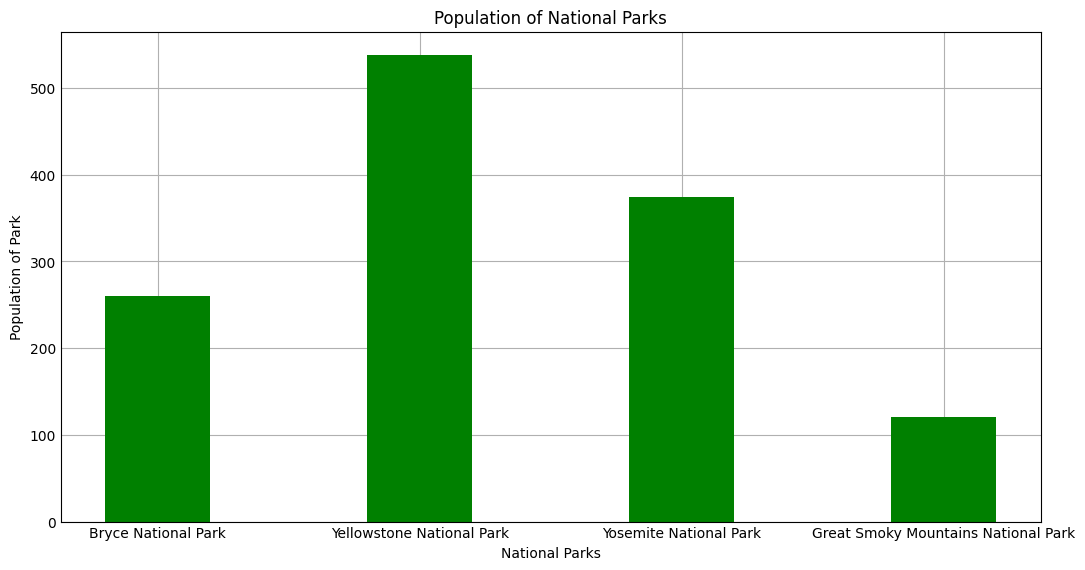

In [51]:
# 1) Conservation_Status by category
parks_and_pops = {}

#gets parks populations and adds them to the dictionary
for animal in list_of_animals:
    if animal.park_name not in parks_and_pops.keys() and animal.park_name != '' :
        parks_and_pops[animal.park_name] = int(animal.observations)
        

    if animal.park_name in parks_and_pops.keys() and animal.park_name != '':
        parks_and_pops[animal.park_name] += int(animal.observations)


#for creating bar graph
plt.style.use('_mpl-gallery')
x = parks_and_pops.keys()
y = parks_and_pops.values()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='green',width = 0.4)

plt.xlabel("National Parks")
plt.ylabel("Population of Park")
plt.title("Population of National Parks")
plt.show()

In [55]:
# 2) Coservation_Status by category per park
categories_of_animals = []
for animal in list_of_animals:
    if animal.category not in categories_of_animals and animal.category != '':
        categories_of_animals.append(animal.category)

for key in parks_and_pops.keys():
    parks_and_pops[key] = {'Mammal':0, 'Bird':0, 'Reptile':0, 'Amphibian':0, 'Fish':0, 'Vascular Plant':0, 'Nonvascular Plant':0}

for animal in list_of_animals:
    if animal.park_name in parks_and_pops.keys() and animal.park_name != '':
        parks_and_pops[animal.park_name][animal.category] += int(animal.observations)

for animal in list_of_animals:
    print(animal.park_name)
    print(animal.common_names) 
    print(animal.scientific_name )


parks = parks_and_pops.keys()
cat1 = parks_and_pops.values()

# fig = plt.figure(figsize = (10, 5))

# # creating the bar plot
# plt.bar(x, y, color ='green',width = 0.4)

# plt.xlabel("National Parks")
# plt.ylabel("Population of Park")
# plt.title("Population of National Parks")
# plt.show()

Bryce National Park
Gapper's Red-Backed Vole
Clethrionomys gapperi gapperi
Yellowstone National Park
American Bison, Bison
Bos bison
Yosemite National Park
Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle
Bos taurus
Yosemite National Park
Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
Ovis aries
Great Smoky Mountains National Park
Wapiti Or Elk
Cervus elaphus

White-Tailed Deer
Odocoileus virginianus

Feral Hog, Wild Pig
Sus scrofa

Coyote
Canis latrans

Gray Wolf
Canis lupus

Red Wolf
Canis rufus

Common Gray Fox, Gray Fox
Urocyon cinereoargenteus

Black Fox, Cross Fox, Red Fox, Silver Fox
Vulpes fulva

Red Fox
Vulpes vulpes

Mountain Lion
Felis concolor

Wild Cat, Wildcat
Felis silvestris

Bobcat
Lynx rufus

Panther (Mountain Lion)
Puma concolor

Striped Skunk
Mephitis mephitis

Eastern Spotted Skunk
Spilogale putorius

River Otter
Lontra canadensis

Northern River Otter
Lutra canadensis

Fisher
Martes pennanti

Mink (Or Weasel)
Mustela

Long-Tailed Weasel
Mustela fr

In [ ]:
# 3) Per park, populations of each category